In [83]:
## Create car-assignment dict
import numpy as np
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import fiona
import io

car_df = pd.read_csv('./files/car-assignments.csv')
# print(car_data
cred_df = pd.read_csv('./files/cc_data.csv')
# print(card_data)
loy_df = pd.read_csv('./files/loyalty_data.csv')
# print(loy_data)
gps_df = pd.read_csv('./files/gps.csv')
print(gps_df)

print('Car assignment data: \n', car_df.head(1), '\n')
print('Credit card data: \n', cred_df.head(1), '\n')
print('Loyalty card data: \n', loy_df.head(1), '\n')
print('Car GPS data: \n', gps_df.head(1))

                  Timestamp  id        lat       long
0       01/06/2014 06:28:01  35  36.076225  24.874689
1       01/06/2014 06:28:01  35  36.076220  24.874596
2       01/06/2014 06:28:03  35  36.076211  24.874443
3       01/06/2014 06:28:05  35  36.076217  24.874253
4       01/06/2014 06:28:06  35  36.076214  24.874167
...                     ...  ..        ...        ...
685164  01/19/2014 20:56:43  30  36.058110  24.902130
685165  01/19/2014 20:56:47  30  36.058258  24.901774
685166  01/19/2014 20:56:48  30  36.058296  24.901711
685167  01/19/2014 20:56:49  30  36.058304  24.901620
685168  01/19/2014 20:56:55  30  36.058490  24.901095

[685169 rows x 4 columns]
Car assignment data: 
   LastName FirstName  CarID   CurrentEmploymentType CurrentEmploymentTitle
0  Alcazar     Lucas    1.0  Information Technology            IT Helpdesk 

Credit card data: 
        timestamp             location  price FirstName LastName
0  1/6/2014 7:28  Brew've Been Served  11.34    Edvard     Vann 



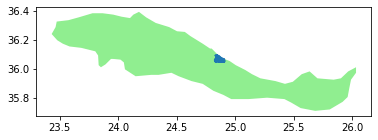

Island geo data: 
      Name                                           geometry
0  Kronos  POLYGON ((24.88970 36.07290, 24.95190 36.05380... 

City geo data: 
         TLID FEDIRP    FENAME FETYPE FEDIRS  FRADDL  TOADDL  FRADDR  TOADDR  \
0  184632270      N  Hallanol     Dr   None     NaN     NaN     NaN     NaN   

                                            geometry  
0  LINESTRING (24.84149 36.07051, 24.84156 36.07042)   



In [2]:
island_shape = gpd.read_file('./files/geospatial/kronos_island.shp')

# Data cleaning
src = fiona.open('./files/geospatial/abila.shp')
meta = src.meta
meta['driver'] = 'GeoJSON'
with io.BytesIO() as buffer:
    with fiona.open(buffer, 'w', **meta) as dst:
        for i, feature in enumerate(src):
            
            try:
                if len(feature['geometry']['coordinates']) > 1:
                    dst.write(feature)
            except:
                print('Error: ', i)
    
    buffer.seek(0)
    city_shape = gpd.read_file(buffer, driver='GeoJSON')
    
# Plot the city shape on the island shape
island_map, ax = plt.subplots()
ax.set_aspect('equal')

island_shape.plot(ax=ax, color='lightgreen')
city_shape.plot(ax=ax)

plt.show()

print('Island geo data: \n', island_shape.head(1), '\n')
print('City geo data: \n', city_shape.head(1), '\n')

24.82403 24.909965 36.045015 36.094918


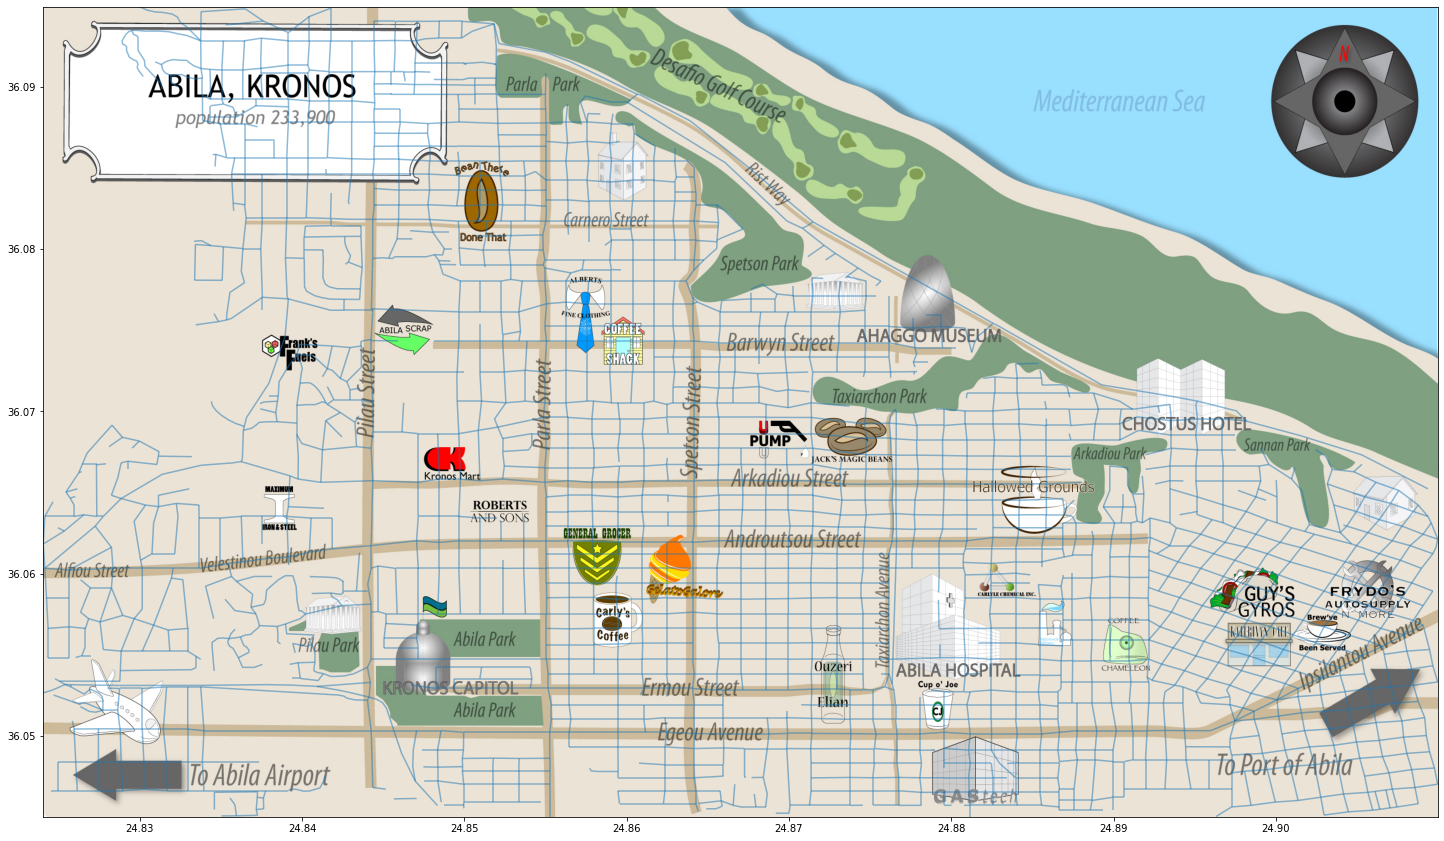

In [3]:
from shapely.geometry import LineString, shape

# Plot the city shape on the city tourist map
img_map = plt.imread('./files/MC2-tourist.jpg')

min_x = min_y = 1e100
max_x = max_y = 0
for item in city_shape.geometry.iloc:
    coords = list(item.coords)
    for c in coords:
        if c[0] < min_x:
            min_x = c[0]
        if c[0] > max_x:
            max_x = c[0]
        if c[1] < min_y:
            min_y = c[1]
        if c[1] > max_y:
            max_y = c[1]

# print(min_x, max_x, min_y, max_y)

city_map, ax = plt.subplots(figsize=[25, 25])
ax.set_aspect('equal')
ax.scatter([1,2], [3,4])
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])

city_shape.plot(ax=ax, alpha=0.5)
ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])

plt.show()

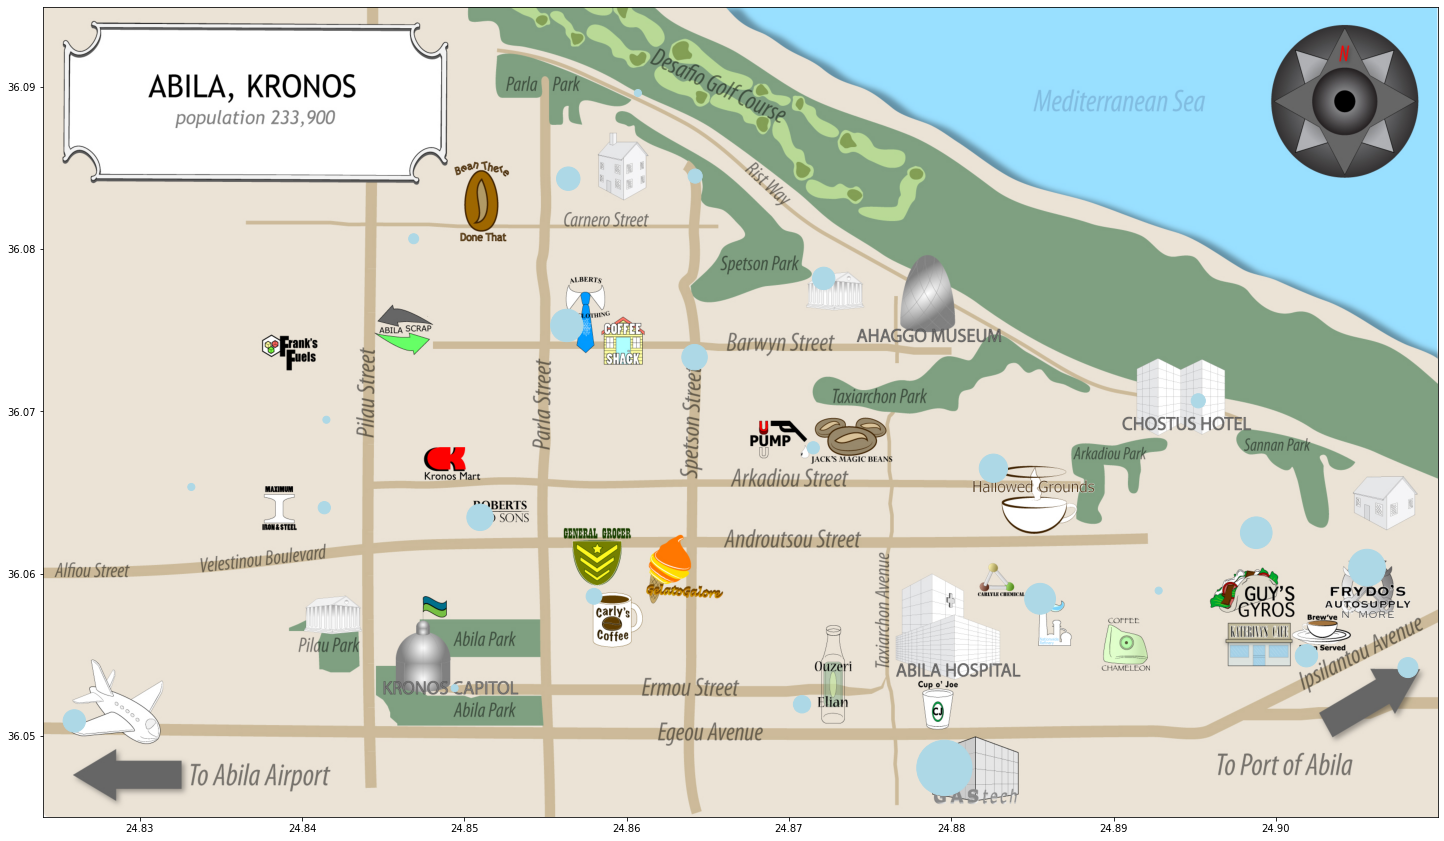

272


In [42]:
common_stops, ax = plt.subplots(figsize=[25, 25])
data = pd.read_json('stops_all_data.txt', lines=True)
gdf_cs = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['long'], data['lat']))

ax.set_aspect('equal')
ax.scatter([1,2], [3,4])
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])

gdf_cs.plot(ax=ax, markersize=data['count']*50, color='lightblue')
ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])
plt.show()

In [5]:
def draw_car_paths(ids):
#     print(ids)
    n = len(ids)
    color = iter(plt.cm.rainbow(np.linspace(0,1,n)))
    

#     for _id in ids:
        
        
#         data = gps_df[gps_df['id'] == _id]
#         print(data)
        
#         car_path, ax = plt.subplots(figsize=[25, 25])
#         ax.set_aspect('equal')
#         ax.scatter([1,2], [3,4])
#         ax.set_xlim([min_x, max_x])
#         ax.set_ylim([min_y, max_y])

#         city_shape.plot(ax=ax, alpha=0.5)
#         ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])

#         plt.plot(data['long'], data['lat'], color=next(color))

#         plt.show()
        
    car_path, ax = plt.subplots(figsize=[25, 25])
    ax.set_aspect('equal')
    ax.scatter([1,2], [3,4])
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])

    city_shape.plot(ax=ax, alpha=0.5)
    ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])

    plt.plot(gps_df['long'], gps_df['lat'])

    plt.show()

In [84]:
import json

stops = []
stops_gps_df = pd.DataFrame()

time_tresh = pd.Timedelta('0 days 00:03:00')
dist_thresh = 0.001


ids = np.unique(gps_df['id'])
nStops = 0
nEvents = 0
for _id in ids:
    
    id_data = gps_df[gps_df['id'] == _id]
    old_ts = None
    for i, ts in enumerate(id_data['Timestamp']):
        if old_ts == None:
            old_ts = pd.Timestamp(ts)
            id_data.loc[id_data.index[i], 'stop'] = False
        else:
            ts = pd.Timestamp(ts)
            if (ts-old_ts > time_tresh):
                id_data.loc[id_data.index[i], 'stop'] = True
                
                new_stop = True
                for s in stops:
                    if len(s) > 0 and \
                    id_data.loc[id_data.index[i], 'long'] > s['long']-dist_thresh and \
                    id_data.loc[id_data.index[i], 'long'] < s['long']+dist_thresh and \
                    id_data.loc[id_data.index[i], 'lat'] > s['lat']-dist_thresh and \
                    id_data.loc[id_data.index[i], 'lat'] < s['lat']+dist_thresh:
                        s['count'] += 1
                        s['long'] = (id_data.loc[id_data.index[i], 'long'] + s['long']) / 2
                        s['lat'] = (id_data.loc[id_data.index[i], 'lat'] + s['lat']) / 2
                        new_stop = False
                        
                        stops_gps_df.loc[nEvents, 'stop_id'] = s['id']
                        stops_gps_df.loc[nEvents, 'car_id'] = _id
                        stops_gps_df.loc[nEvents, 'timestamp'] = ts
                        
                        break

                if new_stop:
                    stops.append({'id': nStops,'long': id_data.loc[id_data.index[i], 'long'],
                          'lat': id_data.loc[id_data.index[i], 'lat'],
                          'count': 1
                         })
                    
                    stops_gps_df.loc[nEvents, 'stop_id'] = s['id']
                    stops_gps_df.loc[nEvents, 'car_id'] = _id
                    stops_gps_df.loc[nEvents, 'timestamp'] = ts

                    nStops += 1
            
                nEvents += 1
            else:
                id_data.loc[id_data.index[i], 'stop'] = False
            old_ts = ts
    print('ID ', _id, ': \n', id_data)

stop_file = open("stops_3min_0.001thresh.txt", "w")
for txt in stops:
    stop_file.write(json.dumps(txt))
stop_file.close()

stop_gps_file = open("stops_timestamps_3min_0.001thresh.txt", "w")
for txt in stops_gps_df:
    stop_gps_file.write(json.dumps(txt))
stop_gps_file.close()

print(stops)
print(gps_df)
print(stops_gps_df)

c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  1 : 
                   Timestamp  id        lat       long   stop
2501    01/06/2014 07:20:01   1  36.066457  24.882582  False
2509    01/06/2014 07:20:03   1  36.066344  24.882589  False
2516    01/06/2014 07:20:06   1  36.066147  24.882584  False
2519    01/06/2014 07:20:07   1  36.066130  24.882576  False
2527    01/06/2014 07:20:10   1  36.065955  24.882615  False
...                     ...  ..        ...        ...    ...
683375  01/19/2014 19:56:44   1  36.066462  24.882061  False
683377  01/19/2014 19:56:45   1  36.066476  24.882168  False
683378  01/19/2014 19:56:47   1  36.066483  24.882272  False
683381  01/19/2014 19:56:49   1  36.066471  24.882475  False
683382  01/19/2014 19:56:50   1  36.066458  24.882534  False

[19311 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  2 : 
                   Timestamp  id        lat       long   stop
3656    01/06/2014 07:30:01   2  36.085460  24.860379  False
3657    01/06/2014 07:30:01   2  36.085506  24.860382  False
3659    01/06/2014 07:30:04   2  36.085449  24.860223  False
3661    01/06/2014 07:30:06   2  36.085450  24.860125  False
3663    01/06/2014 07:30:07   2  36.085478  24.860064  False
...                     ...  ..        ...        ...    ...
684984  01/19/2014 20:27:02   2  36.084679  24.860421  False
684985  01/19/2014 20:27:03   2  36.084745  24.860369  False
684986  01/19/2014 20:27:04   2  36.084800  24.860409  False
684987  01/19/2014 20:27:07   2  36.085107  24.860401  False
684988  01/19/2014 20:27:08   2  36.085228  24.860429  False

[22432 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  3 : 
                   Timestamp  id        lat       long   stop
2350    01/06/2014 07:19:01   3  36.086681  24.857628  False
2358    01/06/2014 07:19:04   3  36.086624  24.857429  False
2363    01/06/2014 07:19:06   3  36.086642  24.857267  False
2365    01/06/2014 07:19:07   3  36.086678  24.857256  False
2370    01/06/2014 07:19:09   3  36.086604  24.857136  False
...                     ...  ..        ...        ...    ...
682865  01/19/2014 19:49:17   3  36.085835  24.857707  False
682866  01/19/2014 19:49:18   3  36.085962  24.857665  False
682869  01/19/2014 19:49:22   3  36.086353  24.857603  False
682871  01/19/2014 19:49:25   3  36.086590  24.857670  False
682872  01/19/2014 19:49:26   3  36.086633  24.857658  False

[23412 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  4 : 
                   Timestamp  id        lat       long   stop
128     01/06/2014 06:33:01   4  36.078209  24.872141  False
129     01/06/2014 06:33:01   4  36.078192  24.872056  False
131     01/06/2014 06:33:02   4  36.078210  24.871948  False
132     01/06/2014 06:33:03   4  36.078195  24.871872  False
133     01/06/2014 06:33:04   4  36.078201  24.871781  False
...                     ...  ..        ...        ...    ...
679337  01/19/2014 16:05:57   4  36.078244  24.871570  False
679340  01/19/2014 16:05:59   4  36.078233  24.871735  False
679341  01/19/2014 16:06:00   4  36.078226  24.871837  False
679344  01/19/2014 16:06:02   4  36.078190  24.872014  False
679347  01/19/2014 16:06:03   4  36.078196  24.872107  False

[23212 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  5 : 
                   Timestamp  id        lat       long   stop
11421   01/06/2014 07:59:01   5  36.067303  24.877898  False
11475   01/06/2014 07:59:07   5  36.067355  24.877580  False
11492   01/06/2014 07:59:09   5  36.067335  24.877458  False
11501   01/06/2014 07:59:10   5  36.067336  24.877403  False
11510   01/06/2014 07:59:11   5  36.067298  24.877381  False
...                     ...  ..        ...        ...    ...
683234  01/19/2014 19:53:58   5  36.066467  24.878032  False
683235  01/19/2014 19:53:59   5  36.066549  24.877990  False
683236  01/19/2014 19:54:00   5  36.066677  24.877987  False
683237  01/19/2014 19:54:01   5  36.066747  24.877984  False
683238  01/19/2014 19:54:02   5  36.066837  24.877960  False

[16473 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  6 : 
                   Timestamp  id        lat       long   stop
2255    01/06/2014 07:18:01   6  36.059485  24.894773  False
2257    01/06/2014 07:18:02   6  36.059389  24.894755  False
2260    01/06/2014 07:18:03   6  36.059322  24.894768  False
2263    01/06/2014 07:18:04   6  36.059356  24.894730  False
2268    01/06/2014 07:18:07   6  36.059229  24.894654  False
...                     ...  ..        ...        ...    ...
663289  01/18/2014 15:52:34   6  36.059752  24.893789  False
663290  01/18/2014 15:52:35   6  36.059706  24.893950  False
663291  01/18/2014 15:52:39   6  36.059603  24.894267  False
663293  01/18/2014 15:52:40   6  36.059656  24.894344  False
663294  01/18/2014 15:52:41   6  36.059576  24.894469  False

[15425 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  7 : 
                   Timestamp  id        lat       long   stop
379     01/06/2014 07:01:01   7  36.084486  24.864238  False
381     01/06/2014 07:01:02   7  36.084378  24.864208  False
382     01/06/2014 07:01:04   7  36.084229  24.864223  False
383     01/06/2014 07:01:05   7  36.084181  24.864245  False
384     01/06/2014 07:01:06   7  36.084178  24.864227  False
...                     ...  ..        ...        ...    ...
684444  01/19/2014 20:11:01   7  36.084477  24.863661  False
684447  01/19/2014 20:11:03   7  36.084484  24.863828  False
684449  01/19/2014 20:11:04   7  36.084427  24.863887  False
684451  01/19/2014 20:11:05   7  36.084461  24.864018  False
684453  01/19/2014 20:11:06   7  36.084427  24.864043  False

[23333 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  8 : 
                   Timestamp  id        lat       long   stop
4031    01/06/2014 07:36:01   8  36.067304  24.885967  False
4032    01/06/2014 07:36:01   8  36.067251  24.885950  False
4042    01/06/2014 07:36:04   8  36.067051  24.885882  False
4046    01/06/2014 07:36:05   8  36.067053  24.885944  False
4050    01/06/2014 07:36:06   8  36.066980  24.885929  False
...                     ...  ..        ...        ...    ...
683822  01/19/2014 20:03:32   8  36.066712  24.885886  False
683825  01/19/2014 20:03:34   8  36.066911  24.885960  False
683828  01/19/2014 20:03:36   8  36.067021  24.885913  False
683829  01/19/2014 20:03:37   8  36.067150  24.885960  False
683830  01/19/2014 20:03:38   8  36.067195  24.885956  False

[15855 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  9 : 
                   Timestamp  id        lat       long   stop
15666   01/06/2014 08:17:01   9  36.081721  24.850954  False
15667   01/06/2014 08:17:01   9  36.081753  24.850947  False
15679   01/06/2014 08:17:04   9  36.081803  24.851150  False
15684   01/06/2014 08:17:05   9  36.081817  24.851223  False
15689   01/06/2014 08:17:06   9  36.081787  24.851198  False
...                     ...  ..        ...        ...    ...
684888  01/19/2014 20:25:00   9  36.084273  24.855378  False
684892  01/19/2014 20:25:02   9  36.084310  24.855601  False
684896  01/19/2014 20:25:06   9  36.084285  24.855926  False
684898  01/19/2014 20:25:07   9  36.084269  24.856059  False
684902  01/19/2014 20:25:10   9  36.084300  24.856301  False

[18593 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  10 : 
                   Timestamp  id        lat       long   stop
328     01/06/2014 06:57:01  10  36.076825  24.865887  False
329     01/06/2014 06:57:01  10  36.076759  24.865869  False
331     01/06/2014 06:57:03  10  36.076574  24.865838  False
332     01/06/2014 06:57:04  10  36.076481  24.865829  False
333     01/06/2014 06:57:05  10  36.076419  24.865834  False
...                     ...  ..        ...        ...    ...
682676  01/19/2014 19:47:38  10  36.076335  24.865794  False
682683  01/19/2014 19:47:40  10  36.076531  24.865843  False
682687  01/19/2014 19:47:41  10  36.076591  24.865860  False
682691  01/19/2014 19:47:42  10  36.076702  24.865853  False
682694  01/19/2014 19:47:43  10  36.076763  24.865859  False

[21693 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  11 : 
                   Timestamp  id        lat       long   stop
427     01/06/2014 07:02:01  11  36.084186  24.858977  False
428     01/06/2014 07:02:01  11  36.084184  24.858958  False
438     01/06/2014 07:02:04  11  36.084221  24.858812  False
440     01/06/2014 07:02:05  11  36.084201  24.858797  False
443     01/06/2014 07:02:06  11  36.084232  24.858675  False
...                     ...  ..        ...        ...    ...
682669  01/19/2014 19:47:36  11  36.083565  24.859014  False
682674  01/19/2014 19:47:37  11  36.083705  24.858976  False
682677  01/19/2014 19:47:38  11  36.083804  24.859006  False
682680  01/19/2014 19:47:39  11  36.083833  24.859029  False
682692  01/19/2014 19:47:42  11  36.084129  24.859052  False

[24713 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  12 : 
                   Timestamp  id        lat       long   stop
944     01/06/2014 07:05:01  12  36.067828  24.899077  False
948     01/06/2014 07:05:02  12  36.067661  24.899229  False
954     01/06/2014 07:05:04  12  36.067559  24.899187  False
965     01/06/2014 07:05:07  12  36.067530  24.899337  False
973     01/06/2014 07:05:09  12  36.067325  24.899386  False
...                     ...  ..        ...        ...    ...
684649  01/19/2014 20:20:53  12  36.066193  24.900485  False
684654  01/19/2014 20:20:57  12  36.066445  24.900234  False
684662  01/19/2014 20:21:07  12  36.066920  24.899549  False
684663  01/19/2014 20:21:08  12  36.067018  24.899532  False
684670  01/19/2014 20:21:16  12  36.067593  24.899238  False

[17185 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  13 : 
                   Timestamp  id        lat       long   stop
3344    01/06/2014 07:27:01  13  36.060435  24.905569  False
3345    01/06/2014 07:27:01  13  36.060372  24.905596  False
3348    01/06/2014 07:27:02  13  36.060300  24.905552  False
3350    01/06/2014 07:27:03  13  36.060212  24.905525  False
3352    01/06/2014 07:27:04  13  36.060168  24.905534  False
...                     ...  ..        ...        ...    ...
672731  01/18/2014 20:21:33  13  36.060703  24.904700  False
672733  01/18/2014 20:21:35  13  36.060581  24.904951  False
672734  01/18/2014 20:21:36  13  36.060560  24.905031  False
672739  01/18/2014 20:21:41  13  36.060491  24.905409  False
672741  01/18/2014 20:21:43  13  36.060435  24.905547  False

[17204 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  14 : 
                   Timestamp  id        lat       long   stop
3208    01/06/2014 07:26:01  14  36.063425  24.896106  False
3211    01/06/2014 07:26:02  14  36.063283  24.896092  False
3226    01/06/2014 07:26:08  14  36.063053  24.895831  False
3229    01/06/2014 07:26:10  14  36.062984  24.895780  False
3240    01/06/2014 07:26:15  14  36.062820  24.895652  False
...                     ...  ..        ...        ...    ...
684265  01/19/2014 20:08:44  14  36.062804  24.897680  False
684267  01/19/2014 20:08:45  14  36.062893  24.897675  False
684270  01/19/2014 20:08:46  14  36.062868  24.897542  False
684272  01/19/2014 20:08:47  14  36.062929  24.897473  False
684293  01/19/2014 20:09:00  14  36.063320  24.896389  False

[16752 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  15 : 
                   Timestamp  id        lat       long   stop
6657    01/06/2014 07:46:01  15  36.060441  24.905631  False
6693    01/06/2014 07:46:07  15  36.060102  24.905459  False
6701    01/06/2014 07:46:08  15  36.060050  24.905359  False
6708    01/06/2014 07:46:09  15  36.059982  24.905355  False
6728    01/06/2014 07:46:12  15  36.059867  24.905277  False
...                     ...  ..        ...        ...    ...
685035  01/19/2014 20:35:57  15  36.059892  24.905269  False
685036  01/19/2014 20:35:58  15  36.059937  24.905406  False
685038  01/19/2014 20:36:00  15  36.060108  24.905479  False
685039  01/19/2014 20:36:01  15  36.060163  24.905532  False
685044  01/19/2014 20:36:03  15  36.060318  24.905524  False

[17315 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  16 : 
                   Timestamp  id        lat       long   stop
1936    01/06/2014 07:15:01  16  36.060372  24.905635  False
1937    01/06/2014 07:15:01  16  36.060384  24.905594  False
1941    01/06/2014 07:15:03  16  36.060327  24.905499  False
1952    01/06/2014 07:15:11  16  36.059914  24.905359  False
1955    01/06/2014 07:15:13  16  36.059886  24.905319  False
...                     ...  ..        ...        ...    ...
683672  01/19/2014 20:01:47  16  36.059097  24.904831  False
683681  01/19/2014 20:01:52  16  36.059557  24.905031  False
683693  01/19/2014 20:01:59  16  36.059977  24.905390  False
683695  01/19/2014 20:02:00  16  36.060131  24.905487  False
683701  01/19/2014 20:02:03  16  36.060340  24.905587  False

[14506 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  17 : 
                   Timestamp  id        lat       long   stop
583     01/06/2014 07:03:01  17  36.062501  24.898804  False
584     01/06/2014 07:03:01  17  36.062413  24.898789  False
589     01/06/2014 07:03:02  17  36.062423  24.898816  False
595     01/06/2014 07:03:04  17  36.062267  24.898732  False
607     01/06/2014 07:03:08  17  36.062200  24.898607  False
...                     ...  ..        ...        ...    ...
683167  01/19/2014 19:53:16  17  36.062022  24.898564  False
683172  01/19/2014 19:53:18  17  36.062229  24.898611  False
683174  01/19/2014 19:53:19  17  36.062307  24.898700  False
683177  01/19/2014 19:53:20  17  36.062391  24.898734  False
683179  01/19/2014 19:53:21  17  36.062360  24.898796  False

[14898 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  18 : 
                   Timestamp  id        lat       long   stop
1591    01/06/2014 07:11:01  18  36.063330  24.896144  False
1592    01/06/2014 07:11:01  18  36.063332  24.896086  False
1596    01/06/2014 07:11:03  18  36.063269  24.896010  False
1598    01/06/2014 07:11:04  18  36.063165  24.895974  False
1602    01/06/2014 07:11:06  18  36.063110  24.895968  False
...                     ...  ..        ...        ...    ...
685125  01/19/2014 20:37:40  18  36.062667  24.898022  False
685128  01/19/2014 20:37:44  18  36.062807  24.897668  False
685130  01/19/2014 20:37:48  18  36.062952  24.897441  False
685134  01/19/2014 20:37:56  18  36.063185  24.896801  False
685139  01/19/2014 20:38:03  18  36.063314  24.896112  False

[17484 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  19 : 
                   Timestamp  id        lat       long   stop
264     01/06/2014 06:53:01  19  36.087845  24.856301  False
265     01/06/2014 06:53:01  19  36.087895  24.856181  False
266     01/06/2014 06:53:03  19  36.087902  24.856027  False
267     01/06/2014 06:53:04  19  36.087915  24.855995  False
268     01/06/2014 06:53:11  19  36.087815  24.855340  False
...                     ...  ..        ...        ...    ...
682817  01/19/2014 19:48:45  19  36.087850  24.855755  False
682821  01/19/2014 19:48:47  19  36.087904  24.855961  False
682827  01/19/2014 19:48:49  19  36.087854  24.856087  False
682830  01/19/2014 19:48:50  19  36.087838  24.856228  False
682832  01/19/2014 19:48:51  19  36.087858  24.856305  False

[24650 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  20 : 
                   Timestamp  id        lat       long   stop
1788    01/06/2014 07:13:01  20  36.065891  24.901068  False
1791    01/06/2014 07:13:02  20  36.065780  24.901039  False
1794    01/06/2014 07:13:03  20  36.065713  24.901120  False
1796    01/06/2014 07:13:04  20  36.065694  24.901101  False
1800    01/06/2014 07:13:06  20  36.065623  24.901196  False
...                     ...  ..        ...        ...    ...
683427  01/19/2014 19:58:39  20  36.065415  24.901464  False
683428  01/19/2014 19:58:40  20  36.065562  24.901415  False
683429  01/19/2014 19:58:41  20  36.065533  24.901265  False
683430  01/19/2014 19:58:42  20  36.065653  24.901242  False
683431  01/19/2014 19:58:44  20  36.065745  24.901118  False

[14184 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  21 : 
                   Timestamp  id        lat       long   stop
3036    01/06/2014 07:24:01  21  36.060410  24.905598  False
3037    01/06/2014 07:24:01  21  36.060346  24.905585  False
3038    01/06/2014 07:24:02  21  36.060272  24.905547  False
3042    01/06/2014 07:24:04  21  36.060182  24.905500  False
3048    01/06/2014 07:24:07  21  36.060115  24.905433  False
...                     ...  ..        ...        ...    ...
682833  01/19/2014 19:48:51  21  36.062976  24.897361  False
682836  01/19/2014 19:48:53  21  36.062953  24.897215  False
682846  01/19/2014 19:49:02  21  36.063310  24.896499  False
682848  01/19/2014 19:49:03  21  36.063343  24.896439  False
682849  01/19/2014 19:49:04  21  36.063275  24.896321  False

[17241 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  22 : 
                   Timestamp  id        lat       long   stop
13087   01/06/2014 08:04:01  22  36.058447  24.901020  False
13088   01/06/2014 08:04:01  22  36.058465  24.901096  False
13103   01/06/2014 08:04:04  22  36.058416  24.901232  False
13114   01/06/2014 08:04:06  22  36.058370  24.901344  False
13128   01/06/2014 08:04:09  22  36.058363  24.901423  False
...                     ...  ..        ...        ...    ...
682466  01/19/2014 19:46:38  22  36.057867  24.902148  False
682474  01/19/2014 19:46:40  22  36.057981  24.902345  False
682478  01/19/2014 19:46:41  22  36.058055  24.902294  False
682498  01/19/2014 19:46:46  22  36.058271  24.901855  False
682523  01/19/2014 19:46:54  22  36.058409  24.901245  False

[14417 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  23 : 
                   Timestamp  id        lat       long   stop
5557    01/06/2014 07:43:01  23  36.058477  24.901046  False
5565    01/06/2014 07:43:02  23  36.058427  24.901162  False
5571    01/06/2014 07:43:03  23  36.058445  24.901145  False
5582    01/06/2014 07:43:05  23  36.058417  24.901249  False
5608    01/06/2014 07:43:11  23  36.058292  24.901492  False
...                     ...  ..        ...        ...    ...
682505  01/19/2014 19:46:49  23  36.058250  24.901693  False
682508  01/19/2014 19:46:50  23  36.058326  24.901522  False
682512  01/19/2014 19:46:51  23  36.058348  24.901457  False
682515  01/19/2014 19:46:52  23  36.058400  24.901434  False
682519  01/19/2014 19:46:53  23  36.058394  24.901262  False

[12321 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  24 : 
                   Timestamp  id        lat       long   stop
4770    01/06/2014 07:40:01  24  36.062446  24.898831  False
4776    01/06/2014 07:40:02  24  36.062360  24.898815  False
4785    01/06/2014 07:40:04  24  36.062369  24.898669  False
4799    01/06/2014 07:40:07  24  36.062241  24.898675  False
4808    01/06/2014 07:40:09  24  36.062123  24.898531  False
...                     ...  ..        ...        ...    ...
685143  01/19/2014 20:38:13  24  36.061905  24.898315  False
685144  01/19/2014 20:38:14  24  36.061906  24.898387  False
685145  01/19/2014 20:38:15  24  36.062029  24.898424  False
685146  01/19/2014 20:38:17  24  36.062165  24.898607  False
685147  01/19/2014 20:38:18  24  36.062242  24.898580  False

[20132 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  25 : 
                   Timestamp  id        lat       long   stop
5558    01/06/2014 07:43:01  25  36.059457  24.894817  False
5573    01/06/2014 07:43:03  25  36.059343  24.894701  False
5585    01/06/2014 07:43:06  25  36.059261  24.894589  False
5594    01/06/2014 07:43:08  25  36.059159  24.894525  False
5601    01/06/2014 07:43:10  25  36.059050  24.894506  False
...                     ...  ..        ...        ...    ...
683905  01/19/2014 20:04:46  25  36.059021  24.894469  False
683906  01/19/2014 20:04:47  25  36.059125  24.894516  False
683908  01/19/2014 20:04:48  25  36.059224  24.894597  False
683910  01/19/2014 20:04:49  25  36.059281  24.894665  False
683912  01/19/2014 20:04:50  25  36.059345  24.894684  False

[14540 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  26 : 
                   Timestamp  id        lat       long   stop
2352    01/06/2014 07:19:01  26  36.072967  24.884036  False
2353    01/06/2014 07:19:01  26  36.072898  24.884003  False
2361    01/06/2014 07:19:04  26  36.072767  24.884044  False
2368    01/06/2014 07:19:07  26  36.072609  24.884037  False
2369    01/06/2014 07:19:08  26  36.072602  24.884095  False
...                     ...  ..        ...        ...    ...
677004  01/19/2014 14:11:54  26  36.072264  24.884049  False
677007  01/19/2014 14:11:56  26  36.072416  24.884117  False
677009  01/19/2014 14:11:57  26  36.072491  24.884040  False
677011  01/19/2014 14:11:58  26  36.072618  24.884082  False
677012  01/19/2014 14:11:59  26  36.072693  24.884057  False

[18423 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  27 : 
                   Timestamp  id        lat       long   stop
3818    01/06/2014 07:34:01  27  36.069227  24.884176  False
3819    01/06/2014 07:34:01  27  36.069184  24.884266  False
3821    01/06/2014 07:34:02  27  36.069134  24.884201  False
3823    01/06/2014 07:34:03  27  36.069116  24.884259  False
3827    01/06/2014 07:34:06  27  36.069018  24.884196  False
...                     ...  ..        ...        ...    ...
677650  01/19/2014 14:32:12  27  36.068603  24.884254  False
677651  01/19/2014 14:32:14  27  36.068757  24.884239  False
677653  01/19/2014 14:32:16  27  36.069005  24.884278  False
677655  01/19/2014 14:32:17  27  36.069086  24.884262  False
677657  01/19/2014 14:32:19  27  36.069189  24.884245  False

[16907 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  28 : 
                   Timestamp  id        lat       long   stop
6660    01/06/2014 07:46:01  28  36.069169  24.879566  False
6661    01/06/2014 07:46:01  28  36.073056  24.875129  False
6669    01/06/2014 07:46:02  28  36.073645  24.876000  False
6675    01/06/2014 07:46:03  28  36.072611  24.875700  False
6684    01/06/2014 07:46:05  28  36.072493  24.876119  False
...                     ...  ..        ...        ...    ...
684460  01/19/2014 20:11:13  28  36.073475  24.876407  False
684461  01/19/2014 20:11:14  28  36.072875  24.875680  False
684462  01/19/2014 20:11:16  28  36.073461  24.875822  False
684463  01/19/2014 20:11:17  28  36.072900  24.875308  False
684464  01/19/2014 20:11:19  28  36.073638  24.875695  False

[16510 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  29 : 
                   Timestamp  id        lat       long   stop
2797    01/06/2014 07:21:48  29  36.059486  24.894849  False
2798    01/06/2014 07:21:48  29  36.059411  24.894790  False
2804    01/06/2014 07:21:50  29  36.059361  24.894744  False
2808    01/06/2014 07:21:51  29  36.059332  24.894735  False
2812    01/06/2014 07:21:53  29  36.059231  24.894676  False
...                     ...  ..        ...        ...    ...
671151  01/18/2014 20:00:58  29  36.059351  24.895041  False
671154  01/18/2014 20:01:00  29  36.059478  24.894888  False
671156  01/18/2014 20:01:02  29  36.059507  24.894814  False
671158  01/18/2014 20:01:03  29  36.059493  24.894827  False
680394  01/19/2014 18:25:16  29  36.059512  24.894772   True

[14332 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  30 : 
                   Timestamp  id        lat       long   stop
5914    01/06/2014 07:44:01  30  36.058442  24.901042  False
5915    01/06/2014 07:44:01  30  36.058472  24.901087  False
5925    01/06/2014 07:44:02  30  36.058496  24.901140  False
5952    01/06/2014 07:44:06  30  36.058365  24.901364  False
5999    01/06/2014 07:44:13  30  36.058236  24.901618  False
...                     ...  ..        ...        ...    ...
685164  01/19/2014 20:56:43  30  36.058110  24.902130  False
685165  01/19/2014 20:56:47  30  36.058258  24.901774  False
685166  01/19/2014 20:56:48  30  36.058296  24.901711  False
685167  01/19/2014 20:56:49  30  36.058304  24.901620  False
685168  01/19/2014 20:56:55  30  36.058490  24.901095  False

[14005 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  31 : 
                   Timestamp  id        lat       long   stop
591393  01/17/2014 07:31:01  31  36.070723  24.895187  False
591394  01/17/2014 07:31:01  31  36.070668  24.895150  False
591410  01/17/2014 07:31:05  31  36.070482  24.895163  False
591415  01/17/2014 07:31:06  31  36.070474  24.895149  False
591425  01/17/2014 07:31:08  31  36.070350  24.895125  False
...                     ...  ..        ...        ...    ...
682909  01/19/2014 19:50:14  31  36.069647  24.895208  False
682911  01/19/2014 19:50:16  31  36.069764  24.895248  False
682913  01/19/2014 19:50:17  31  36.069952  24.895215  False
682916  01/19/2014 19:50:21  31  36.070235  24.895215  False
682921  01/19/2014 19:50:26  31  36.070632  24.895227  False

[2317 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  32 : 
                   Timestamp  id        lat       long   stop
429     01/06/2014 07:02:01  32  36.072148  24.874618  False
430     01/06/2014 07:02:01  32  36.072185  24.874626  False
435     01/06/2014 07:02:03  32  36.072278  24.874634  False
439     01/06/2014 07:02:04  32  36.072340  24.874667  False
441     01/06/2014 07:02:05  32  36.072389  24.874649  False
...                     ...  ..        ...        ...    ...
684840  01/19/2014 20:23:54  32  36.072455  24.874437  False
684842  01/19/2014 20:23:57  32  36.072421  24.874694  False
684844  01/19/2014 20:23:58  32  36.072359  24.874680  False
684846  01/19/2014 20:23:59  32  36.072250  24.874628  False
684848  01/19/2014 20:24:00  32  36.072189  24.874637  False

[20035 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  33 : 
                   Timestamp  id        lat       long   stop
3209    01/06/2014 07:26:01  33  36.062476  24.898820  False
3214    01/06/2014 07:26:03  33  36.062407  24.898714  False
3217    01/06/2014 07:26:04  33  36.062268  24.898697  False
3222    01/06/2014 07:26:06  33  36.062284  24.898661  False
3228    01/06/2014 07:26:09  33  36.062150  24.898540  False
...                     ...  ..        ...        ...    ...
684597  01/19/2014 20:20:14  33  36.061980  24.898376  False
684599  01/19/2014 20:20:15  33  36.062060  24.898442  False
684601  01/19/2014 20:20:16  33  36.062085  24.898483  False
684604  01/19/2014 20:20:18  33  36.062247  24.898596  False
684606  01/19/2014 20:20:19  33  36.062325  24.898720  False

[15184 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  34 : 
                   Timestamp  id        lat       long   stop
431     01/06/2014 07:02:01  34  36.067692  24.902492  False
433     01/06/2014 07:02:02  34  36.067701  24.902513  False
436     01/06/2014 07:02:03  34  36.067679  24.902661  False
449     01/06/2014 07:02:08  34  36.067501  24.902768  False
468     01/06/2014 07:02:16  34  36.067223  24.903087  False
...                     ...  ..        ...        ...    ...
678805  01/19/2014 15:56:56  34  36.067158  24.903143  False
678806  01/19/2014 15:56:58  34  36.067281  24.902981  False
678807  01/19/2014 15:56:59  34  36.067440  24.902939  False
678808  01/19/2014 15:57:03  34  36.067636  24.902724  False
678809  01/19/2014 15:57:05  34  36.067645  24.902483  False

[17792 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  35 : 
                   Timestamp  id        lat       long   stop
0       01/06/2014 06:28:01  35  36.076225  24.874689  False
1       01/06/2014 06:28:01  35  36.076220  24.874596  False
2       01/06/2014 06:28:03  35  36.076211  24.874443  False
3       01/06/2014 06:28:05  35  36.076217  24.874253  False
4       01/06/2014 06:28:06  35  36.076214  24.874167  False
...                     ...  ..        ...        ...    ...
684128  01/19/2014 20:07:11  35  36.076204  24.874104  False
684132  01/19/2014 20:07:13  35  36.076220  24.874287  False
684136  01/19/2014 20:07:15  35  36.076248  24.874440  False
684138  01/19/2014 20:07:16  35  36.076224  24.874562  False
684140  01/19/2014 20:07:17  35  36.076234  24.874629  False

[20291 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  101 : 
                   Timestamp   id        lat       long   stop
4035    01/06/2014 07:36:01  101  36.048027  24.879577  False
4036    01/06/2014 07:36:01  101  36.048073  24.879577  False
4039    01/06/2014 07:36:02  101  36.048128  24.879574  False
4041    01/06/2014 07:36:03  101  36.048174  24.879569  False
4045    01/06/2014 07:36:04  101  36.048223  24.879577  False
...                     ...  ...        ...        ...    ...
562998  01/16/2014 17:50:44  101  36.048534  24.879570  False
563005  01/16/2014 17:50:45  101  36.048443  24.879571  False
563010  01/16/2014 17:50:46  101  36.048363  24.879567  False
563014  01/16/2014 17:50:47  101  36.048269  24.879578  False
563019  01/16/2014 17:50:48  101  36.048178  24.879568  False

[17840 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  104 : 
                   Timestamp   id        lat       long   stop
18886   01/06/2014 10:32:33  104  36.048028  24.879575  False
18887   01/06/2014 10:32:33  104  36.048111  24.879576  False
18888   01/06/2014 10:32:34  104  36.048205  24.879575  False
18889   01/06/2014 10:32:36  104  36.048376  24.879576  False
18890   01/06/2014 10:32:37  104  36.048458  24.879568  False
...                     ...  ...        ...        ...    ...
588972  01/16/2014 21:06:45  104  36.048430  24.879571  False
588973  01/16/2014 21:06:46  104  36.048347  24.879572  False
588974  01/16/2014 21:06:47  104  36.048255  24.879572  False
588975  01/16/2014 21:06:48  104  36.048162  24.879566  False
588976  01/16/2014 21:06:49  104  36.048074  24.879565  False

[15939 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  105 : 
                   Timestamp   id        lat       long   stop
71853   01/07/2014 08:50:54  105  36.048028  24.879567  False
71854   01/07/2014 08:50:54  105  36.048073  24.879572  False
71856   01/07/2014 08:50:55  105  36.048128  24.879570  False
71858   01/07/2014 08:50:56  105  36.048182  24.879576  False
71859   01/07/2014 08:50:57  105  36.048225  24.879572  False
...                     ...  ...        ...        ...    ...
576997  01/16/2014 19:07:28  105  36.048399  24.879567  False
577000  01/16/2014 19:07:29  105  36.048320  24.879577  False
577004  01/16/2014 19:07:30  105  36.048224  24.879567  False
577008  01/16/2014 19:07:31  105  36.048139  24.879566  False
577011  01/16/2014 19:07:32  105  36.048055  24.879571  False

[9732 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  106 : 
                   Timestamp   id        lat       long   stop
80349   01/07/2014 12:25:50  106  36.048028  24.879567  False
80350   01/07/2014 12:25:50  106  36.048112  24.879567  False
80354   01/07/2014 12:25:51  106  36.048205  24.879574  False
80359   01/07/2014 12:25:52  106  36.048289  24.879571  False
80362   01/07/2014 12:25:53  106  36.048379  24.879573  False
...                     ...  ...        ...        ...    ...
583483  01/16/2014 20:00:15  106  36.048446  24.879568  False
583485  01/16/2014 20:00:16  106  36.048353  24.879567  False
583486  01/16/2014 20:00:17  106  36.048272  24.879574  False
583488  01/16/2014 20:00:18  106  36.048188  24.879575  False
583490  01/16/2014 20:00:19  106  36.048096  24.879576  False

[12278 rows x 5 columns]


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  107 : 
                   Timestamp   id        lat       long   stop
18076   01/06/2014 08:46:20  107  36.048030  24.879576  False
18077   01/06/2014 08:46:20  107  36.048081  24.879565  False
18078   01/06/2014 08:46:21  107  36.048127  24.879570  False
18079   01/06/2014 08:46:22  107  36.048175  24.879573  False
18080   01/06/2014 08:46:23  107  36.048233  24.879567  False
...                     ...  ...        ...        ...    ...
634002  01/17/2014 17:20:57  107  36.048401  24.879569  False
634004  01/17/2014 17:20:58  107  36.048320  24.879573  False
634008  01/17/2014 17:20:59  107  36.048228  24.879566  False
634012  01/17/2014 17:21:00  107  36.048136  24.879569  False
634015  01/17/2014 17:21:01  107  36.048055  24.879566  False

[16303 rows x 5 columns]
[{'id': 0, 'long': 24.885878270896587, 'lat': 36.063700733605046, 'count': 71}, {'id': 1, 'long': 24.87957118229764, 'lat': 36.04803861938129, 'count': 755}, {'id': 2, 'long': 24.85760052171417, 'lat': 36.0766489346912

In [49]:
print(np.unique(gps_df['id']))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35 101
 104 105 106 107]
